Populating the interactive namespace from numpy and matplotlib


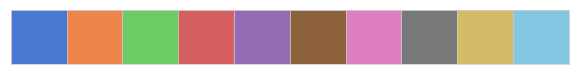

In [7]:
"""
In this file I am comparining two different methods for the noise estimate. 
One is our used method of just estimating the baseline noise. The other one
uses a fixed threshold and scan the trigger efficiency with different pulse
amplitudes.
"""
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from scipy.optimize import curve_fit
from scipy.special import erf
import seaborn as sns

colors = sns.color_palette('muted')
sns.palplot(colors)
sns.set_style('whitegrid')

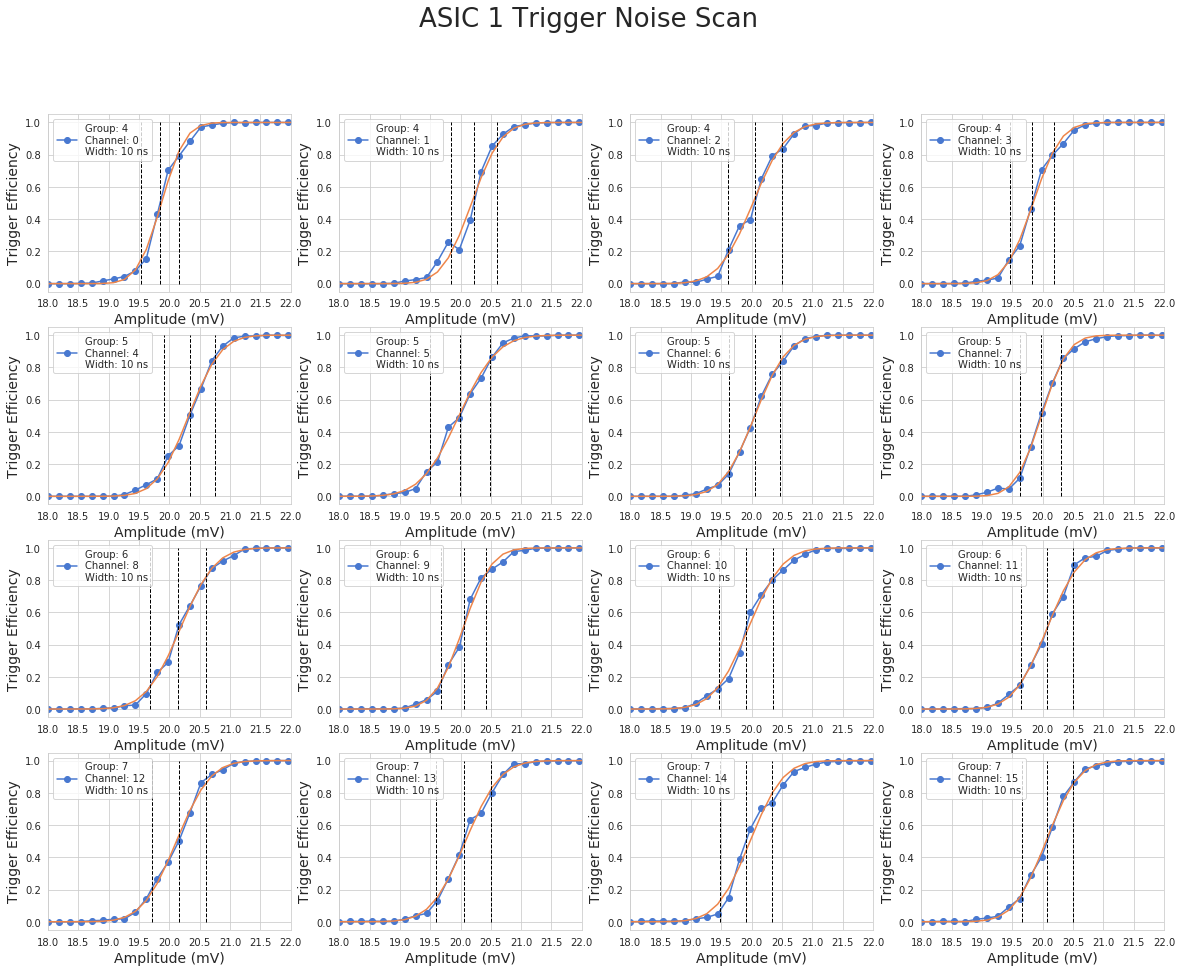

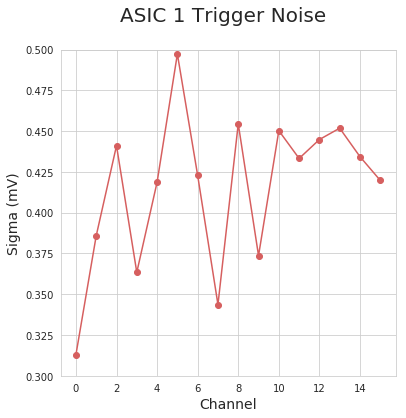

In [9]:
def cumulative(x, mu, sigma):
    var = (x - mu) / sigma
    return (0.5 * (1 + erf(var / np.sqrt(2))))

def find50(dataX, dataY):
    for i in range(dataY.shape[0]-1):
        if(dataY[i]<0.5 and dataY[i+1]>=0.5):
            x1 = dataX[i]
            x2 = dataX[i+1]
            y1 = dataY[i]
            y2 = dataY[i+1]
            m = (y2-y1)/(x2-x1)
            finalX = (0.5 - y1)/m + x1
            break
    #print finalX
    return finalX

directory = "/data/wipac/CTA/target5and7data/testData2019/module3/T5TEATesting/pulse_scan_runs/"
#read data for trig ena scans checks:
asics = [1]
for asic in asics:
    fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20,15))
    sigmafig, sigmaax = plt.subplots(figsize=(6, 6))
    sigmas = []
    channels = np.linspace(0, 15, 16)
    for ch in range(16):
        group = asic * 4 + ch / 4
        la = "Group: {}\nChannel: {}\nWidth: 10 ns".format(group, ch)
        filename = directory+"pulseScan_g_{}_ch_{}.dat".format(group, ch)
        if os.stat(filename).st_size == 0:
            sigmas.append(0)
            continue
        else:
            xdata, ydata = np.loadtxt(filename, usecols=(0,1), unpack=True)
            xdata *= 0.3
            ydata /= 1000.0
            popt, pocv = curve_fit(cumulative, xdata, ydata, p0=[20.0, 0.6])
            sigmas.append(popt[1])
            midlevel = find50(xdata, ydata)
            ax[ch/4, ch%4].plot(xdata, ydata, label=la, marker='o', color=colors[0])
            ax[ch/4, ch%4].plot(xdata, cumulative(xdata, popt[0], popt[1]), color=colors[1])
            ax[ch/4, ch%4].plot([midlevel, midlevel], [0,1], color="black", linewidth=1, linestyle="--")
            ax[ch/4, ch%4].plot([midlevel + popt[1], midlevel + popt[1]], [0, 1], color="black", linewidth=1, linestyle="--")
            ax[ch/4, ch%4].plot([midlevel - popt[1], midlevel - popt[1]], [0, 1], color="black", linewidth=1, linestyle="--")
            ax[ch/4, ch%4].set_xlabel("Amplitude (mV)", fontsize=14)
            ax[ch/4, ch%4].set_ylabel("Trigger Efficiency", fontsize=14)
            ax[ch/4, ch%4].set_xlim((18,22))
            ax[ch/4, ch%4].legend(loc="upper left")
    fig.suptitle("ASIC {} Trigger Noise Scan".format(asic), fontsize=26)
    fig.savefig("/data/wipac/CTA/target5and7data/testData2019/module3/T5TEATesting/figures/trigger_noise_pulse_scan_10ns_asic_{}.pdf".format(asic))
    fig.savefig("/data/wipac/CTA/target5and7data/testData2019/module3/T5TEATesting/figures/trigger_noise_pulse_scan_10ns_asic_{}.png".format(asic))
    fig.show()
    sigmaax.plot(channels, sigmas, marker='o', color=colors[3])
    sigmaax.set_xlabel("Channel", fontsize=14)
    sigmaax.set_ylabel("Sigma (mV)", fontsize=14)
    sigmaax.set_ylim((0.3, 0.5))
    sigmafig.suptitle("ASIC {} Trigger Noise".format(asic), fontsize=20)
    sigmafig.savefig("/data/wipac/CTA/target5and7data/testData2019/module3/T5TEATesting/figures/trigger_noise_sigmas_10ns_asic_{}.pdf".format(asic))
    sigmafig.savefig("/data/wipac/CTA/target5and7data/testData2019/module3/T5TEATesting/figures/trigger_noise_sigmas_10ns_asic_{}.png".format(asic))
    sigmafig.show()
        